# CSCI521: End-to-End Machine Learning Example
## Text Classification + Unsupervised Clustering + Simple Neural Network

This Jupyter Notebook demonstrates an end-to-end machine learning workflow, touching upon multiple concepts from the course syllabus:

1. **Data Loading**: Introduction to a text dataset (20 Newsgroups).
2. **Exploratory Data Analysis (EDA)**: Inspecting the text data.
3. **Preprocessing & Embeddings**: Using text vectorization (TF-IDF) and optional embeddings.
4. **Supervised Learning**: Building classification models (Naive Bayes, SVM, and Logistic Regression) and discussing overfitting/underfitting.
5. **Model Evaluation**: Using precision, recall, f1-score, accuracy. Cross-validation and grid search.
6. **Unsupervised Learning**: Using K-Means to cluster documents.
7. **Dimensionality Reduction**: Truncated SVD (as an analogy to PCA for text).
8. **Neural Networks**: A simple feed-forward network using Keras/TensorFlow.

**Topics Covered (Mapping to Syllabus)**
- Introduction to Machine Learning with Python (using scikit-learn & Keras)
- Supervised vs. Unsupervised Learning
- Classification and basics of text classification
- Overfitting and underfitting
- Preprocessing, Vectorization (TF-IDF)
- Evaluation Metrics (accuracy, precision, recall, f1-score)
- Hyperparameter tuning (GridSearchCV)
- Naive Bayes, Support Vector Machines
- Dimensionality Reduction for high-dimensional data
- K-Means for clustering (unsupervised)
- Simple Neural Network in Keras



## 1. Setup and Imports

Let's import the necessary libraries. We'll be using:
- **NumPy**, **Pandas** for data manipulation
- **Matplotlib**, **Seaborn** for visualization
- **scikit-learn** for our machine learning models, pipeline, metrics, and the 20 Newsgroups dataset
- **TensorFlow/Keras** for neural network construction

_Note: If you do not have all libraries installed, you may need to do so before running the notebook (e.g., `pip install seaborn tensorflow`)._

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## 2. Load and Explore the Dataset

The [20 Newsgroups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) is a collection of ~20k newsgroup documents partitioned across 20 different newsgroups (topics). It is commonly used for **text classification** tasks.

We'll load only a subset (for instance, a few categories) to keep processing relatively quick. For demonstration, let's pick 4 categories:

1. `comp.graphics`
2. `rec.sport.baseball`
3. `sci.med`
4. `talk.politics.mideast`

Feel free to select more or fewer categories. We'll do a quick EDA to understand the data shape.

In [ ]:
# Define categories (topics)
categories = [
    'comp.graphics',
    'rec.sport.baseball',
    'sci.med',
    'talk.politics.mideast'
]

# Fetch training data (we can also fetch test data separately)
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

X_train_raw, y_train = newsgroups_train.data, newsgroups_train.target
X_test_raw, y_test = newsgroups_test.data, newsgroups_test.target

print("Number of training samples:", len(X_train_raw))
print("Number of test samples:\t", len(X_test_raw))
print("Target names:", newsgroups_train.target_names)

Number of training samples: 2339
Number of test samples:	 1558
Target names: ['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.mideast']


### 2.1 Quick Glimpse of the Data
Let's look at a single training sample to get a feel for how the data looks.

In [ ]:
sample_index = 5
print("Category:", newsgroups_train.target_names[y_train[sample_index]])
print("\nRaw text:\n")
print(X_train_raw[sample_index][:500], "...")

Category: sci.med

Raw text:

From: noring@netcom.com (Jon Noring)
Subject: Good Grief!  (was Re: Candida Albicans: what is it?)
Organization: Netcom Online Communications Services (408-241-9760 login: guest)
Lines: 81

In article rind@enterprise.bih.harvard.edu (David Rind) writes:
>In article davpa@ida.liu.se  (David Partain) writes:

>>Someone I know has recently been diagnosed as having Candida Albicans, 
>>a disease about which I can find no information.  Apparently it has something
>>to do with the body's production of ...


You can see that the text data can be messy (with headers, emails, newlines). We'll rely on scikit-learn's **TfidfVectorizer** to handle tokenization and basic preprocessing by default (removing punctuation, lowercasing, etc.).

## 3. Preprocessing and Vectorization

We will create a **Pipeline** that does:

1. **TfidfVectorizer**: Converts text into a TF-IDF feature matrix.
2. **Classifier**: We'll try out multiple models (Naive Bayes, SVM, Logistic Regression).

### 3.1 Train-Test Split (Optional)
Technically, we've already got separate `train` and `test` subsets courtesy of `fetch_20newsgroups`. We'll keep those. If you are using a custom dataset, you'd typically do `train_test_split` here.

## 4. Supervised Learning Models

### 4.1 Naive Bayes Model
We'll start with a **Multinomial Naive Bayes** classifier, which is a common baseline for text classification tasks.

In [ ]:
# Create a pipeline
nb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words='english')),
    ("nb", MultinomialNB())
])

# Train
nb_pipeline.fit(X_train_raw, y_train)

# Predict
y_pred_nb = nb_pipeline.predict(X_test_raw)

# Evaluate
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, target_names=newsgroups_train.target_names))
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm_nb)

Naive Bayes Accuracy: 0.9614890885750963

Classification Report:
                        precision    recall  f1-score   support

        comp.graphics       0.96      0.95      0.95       389
   rec.sport.baseball       0.94      0.99      0.96       397
              sci.med       0.98      0.92      0.95       396
talk.politics.mideast       0.97      0.98      0.98       376

             accuracy                           0.96      1558
            macro avg       0.96      0.96      0.96      1558
         weighted avg       0.96      0.96      0.96      1558

Confusion Matrix:
 [[368  13   5   3]
 [  1 395   0   1]
 [ 11  12 366   7]
 [  3   2   2 369]]


### 4.2 Support Vector Machine (SVM)

Next, we'll try a **Support Vector Classifier** with a linear kernel. We'll also illustrate a quick **GridSearchCV** for hyperparameter tuning (looking at different values of `C`).

We'll do cross-validation on the **training set** only. Then we'll evaluate the best model on the **test set**.

In [ ]:
# Pipeline for SVM
svm_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words='english')),
    ("svc", SVC(kernel='linear'))
])

# Parameter grid for SVM
param_grid_svm = {
    "svc__C": [0.01, 0.1, 1, 10]
}

grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=3, n_jobs=-1, verbose=1)
grid_svm.fit(X_train_raw, y_train)

print("Best Params for SVM:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

# Evaluate on the test set
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_raw)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("\nTest Accuracy with best SVM:", acc_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=newsgroups_train.target_names))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params for SVM: {'svc__C': 1}
Best CV Accuracy: 0.9794784020714702

Test Accuracy with best SVM: 0.9518613607188704

Classification Report:
                        precision    recall  f1-score   support

        comp.graphics       0.93      0.96      0.95       389
   rec.sport.baseball       0.94      0.99      0.97       397
              sci.med       0.95      0.92      0.93       396
talk.politics.mideast       0.99      0.94      0.97       376

             accuracy                           0.95      1558
            macro avg       0.95      0.95      0.95      1558
         weighted avg       0.95      0.95      0.95      1558



### 4.3 Logistic Regression
We'll also see how **Logistic Regression** performs, with or without tuning.

In [ ]:
# Pipeline for Logistic Regression
lr_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words='english')),
    ("lr", LogisticRegression(max_iter=2000))
])

# Quick param grid
param_grid_lr = {
    "lr__C": [0.01, 0.1, 1, 10],
    "lr__penalty": ["l2"]  # using l2 as a default example
}

grid_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=3, n_jobs=-1, verbose=1)
grid_lr.fit(X_train_raw, y_train)

print("Best Params for LR:", grid_lr.best_params_)
print("Best CV Accuracy:", grid_lr.best_score_)

# Evaluate on the test set
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_raw)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("\nTest Accuracy with best LR:", acc_lr)
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=newsgroups_train.target_names))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params for LR: {'lr__C': 10, 'lr__penalty': 'l2'}
Best CV Accuracy: 0.9799057524988206

Test Accuracy with best LR: 0.9557124518613607

Classification Report:
                        precision    recall  f1-score   support

        comp.graphics       0.93      0.97      0.95       389
   rec.sport.baseball       0.94      0.99      0.97       397
              sci.med       0.96      0.92      0.94       396
talk.politics.mideast       0.99      0.95      0.97       376

             accuracy                           0.96      1558
            macro avg       0.96      0.96      0.96      1558
         weighted avg       0.96      0.96      0.96      1558



## 5. Discussion: Overfitting, Underfitting, and Model Complexity

- **Overfitting**: If your model is too complex or you let it train too long (e.g. an SVM with an extremely high C), it might memorize the training data but fail to generalize.
- **Underfitting**: If your model is too simple or you have not tuned hyperparameters well (e.g., a very small C in SVM or logistic regression), performance might be poor on training and test sets alike.
- **Generalization**: The goal is to find a sweet spot where your model balances bias and variance.

In text classification, large vocabulary and sparse data can also lead to issues. Regularization (`C` in SVM/Logistic Regression) helps control that.


## 6. Unsupervised Learning: K-Means Clustering

Even though our dataset is labeled, let's demonstrate how **unsupervised** clustering would group the documents if we ignore labels. We'll do the following:
1. Take the same TF-IDF representation.
2. Optionally reduce the dimensionality with **TruncatedSVD** (similar to PCA for sparse data).
3. Apply **K-Means** with `k=4` (because we have 4 categories in our subset) and see how it groups the documents.

### 6.1 Dimensionality Reduction
Text data often has tens of thousands of dimensions. We'll reduce it to, say, 50 dimensions for clustering.


In [ ]:
# Vectorize the text (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=20000)
X_train_tfidf = vectorizer.fit_transform(X_train_raw)

# Dimensionality Reduction to 50 components
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)

print("Original shape:", X_train_tfidf.shape)
print("Reduced shape:\t", X_train_svd.shape)

Original shape: (2339, 20000)
Reduced shape:	 (2339, 50)


### 6.2 K-Means Clustering
We'll cluster into 4 clusters. After clustering, we can look at the distribution of labels within each cluster.

In [ ]:
# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_svd)

cluster_labels = kmeans.labels_
print("Cluster assignments:", np.unique(cluster_labels, return_counts=True))

# Let's compare cluster assignments with actual y_train labels.
df_clusters = pd.DataFrame({
    'cluster': cluster_labels,
    'true_label': y_train
})
# We'll see how many times each actual category ended up in each cluster
ct = pd.crosstab(df_clusters['cluster'], df_clusters['true_label'])
print("\nContingency Table:\n", ct)

Cluster assignments: (array([0, 1, 2, 3], dtype=int32), array([1872,  132,  257,   78]))

Contingency Table:
 true_label    0    1    2    3
cluster                       
0           584  597  516  175
1             0    0    0  132
2             0    0    0  257
3             0    0   78    0


You may notice that some clusters align decently with certain categories, while others are more mixed. Clustering can sometimes reflect major topical differences but it's rarely perfect compared to supervised classification.

## 7. Simple Neural Network with Keras

We'll build a very simple feed-forward network in Keras to classify the same data. This is a demonstration of a **neural network** approach:

1. We'll transform the raw text into TF-IDF features (just as before).
2. Convert the labels to a one-hot encoding if needed (though in Keras you can use `sparse_categorical_crossentropy`).
3. Build a small neural network: Input -> Dense -> ReLU -> Dense -> Softmax.
4. Train for a few epochs.


### 7.1 Data Preparation for Neural Network

Neural networks typically require numeric arrays (NumPy arrays or tensors). We'll do the following:

1. Vectorize the training and test sets using TF-IDF.
2. Convert the resulting sparse matrices to dense arrays (be careful if your dataset is large!).
3. Scale or at least cast them to float32 for Keras.

Alternatively, we could use embeddings or other advanced text representations (like word embeddings, BERT, etc.), but here we'll keep it simple.


In [ ]:
# Vectorize again specifically for NN.
tfidf_nn = TfidfVectorizer(stop_words='english', max_features=5000)  # reduce features to avoid huge memory usage
X_train_tfidf_nn = tfidf_nn.fit_transform(X_train_raw)
X_test_tfidf_nn = tfidf_nn.transform(X_test_raw)

print("Train shape (sparse):", X_train_tfidf_nn.shape)
print("Test shape (sparse): ", X_test_tfidf_nn.shape)

# Convert to dense
X_train_dense = X_train_tfidf_nn.toarray()
X_test_dense = X_test_tfidf_nn.toarray()

# Convert dtype
X_train_dense = X_train_dense.astype('float32')
X_test_dense = X_test_dense.astype('float32')

print("New dense shape:", X_train_dense.shape)

Train shape (sparse): (2339, 5000)
Test shape (sparse):  (1558, 5000)
New dense shape: (2339, 5000)


### 7.2 Defining the Model
We'll define a small feed-forward model with 1 hidden layer. We have 4 target classes, so we need 4 output units with `softmax`.

In [ ]:
num_features = X_train_dense.shape[1]
num_classes = len(categories)

model = keras.Sequential([
    layers.InputLayer(input_shape=(num_features,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         320,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320,324 (1.22 MB)

 Trainable params: 320,324 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

### 7.3 Training the Neural Network

We'll train for a few epochs. Because this is a relatively small dataset (given we've chosen 4 categories), this should train quickly. If your machine is slower, reduce the epochs or the hidden layer size.

> **Note**: For large text datasets, more sophisticated embeddings or architectures (CNN, RNN, Transformers) typically perform better. This example is primarily to demonstrate the pipeline for building a neural network in Keras.

In [ ]:
epochs = 5
batch_size = 32

history = model.fit(
    X_train_dense, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7108 - loss: 1.2885 - val_accuracy: 0.9765 - val_loss: 0.8382
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9901 - loss: 0.6549 - val_accuracy: 0.9850 - val_loss: 0.3932
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9870 - loss: 0.2673 - val_accuracy: 0.9829 - val_loss: 0.2255
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9909 - loss: 0.1333 - val_accuracy: 0.9829 - val_loss: 0.1589
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9990 - loss: 0.0755 - val_accuracy: 0.9829 - val_loss: 0.1257


### 7.4 Evaluating the Neural Network


In [ ]:
nn_loss, nn_acc = model.evaluate(X_test_dense, y_test, verbose=0)
print("Test Accuracy (NN):", nn_acc)

y_pred_nn = model.predict(X_test_dense)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)
print("\nClassification Report (NN):\n", classification_report(y_test, y_pred_nn_labels, target_names=newsgroups_train.target_names))
cm_nn = confusion_matrix(y_test, y_pred_nn_labels)
print("Confusion Matrix (NN):\n", cm_nn)

Test Accuracy (NN): 0.9512194991111755
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report (NN):
                        precision    recall  f1-score   support

        comp.graphics       0.94      0.95      0.95       389
   rec.sport.baseball       0.94      0.97      0.96       397
              sci.med       0.95      0.91      0.93       396
talk.politics.mideast       0.97      0.97      0.97       376

             accuracy                           0.95      1558
            macro avg       0.95      0.95      0.95      1558
         weighted avg       0.95      0.95      0.95      1558

Confusion Matrix (NN):
 [[371   8   8   2]
 [  3 387   5   2]
 [ 18  11 361   6]
 [  2   5   6 363]]


We can visualize the training history (accuracy/loss) to see if we overfit or underfit.

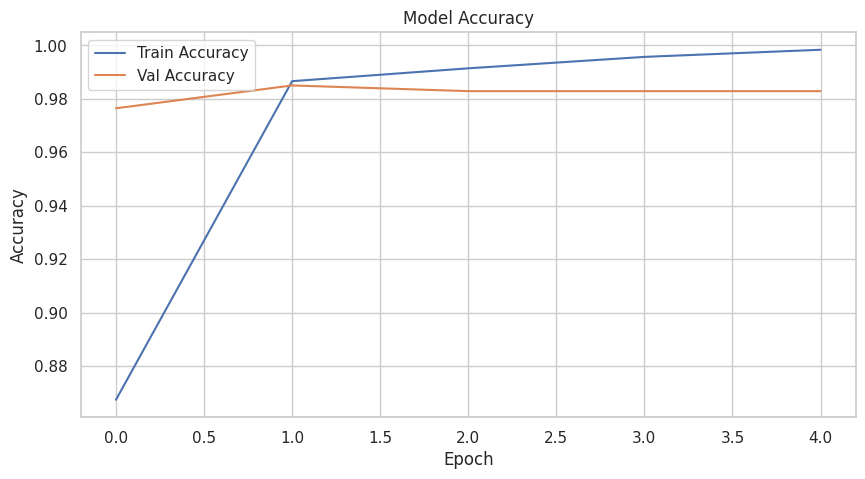

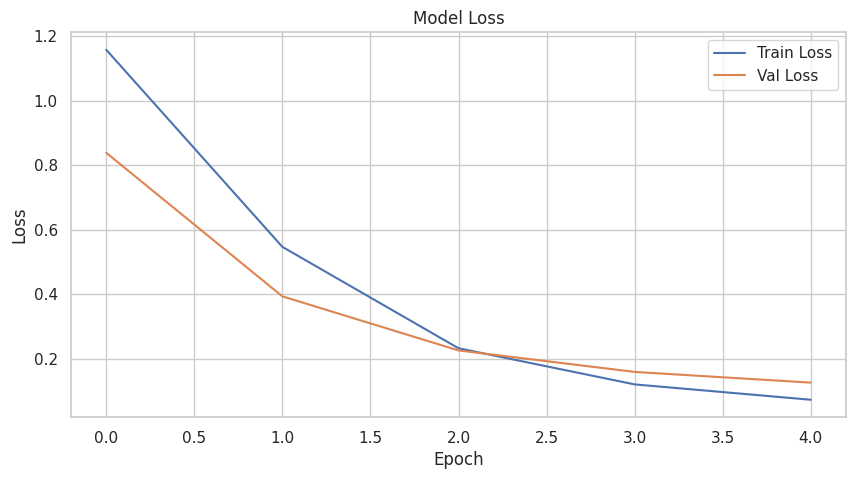

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 8. Conclusion and Next Steps

In this notebook, we:
1. **Loaded** a text dataset (20 Newsgroups) with multiple categories.
2. **Explored** the raw text and observed its structure.
3. **Vectorized** the text data using TF-IDF.
4. **Built and Evaluated** multiple **supervised** models (Naive Bayes, SVM, Logistic Regression) using cross-validation and grid search.
5. Demonstrated **unsupervised** learning (K-Means) to cluster the documents.
6. Used **dimensionality reduction** (Truncated SVD) to handle high-dimensional text for clustering.
7. Created a **simple neural network** using Keras to classify the same data.

**Key Points**:
- We covered concepts of **overfitting** and **underfitting**.
- Showed how to **evaluate** models with metrics like accuracy, precision, and recall.
- Demonstrated **GridSearchCV** for **hyperparameter tuning**.
- Illustrated a **basic feed-forward neural network** for text classification.
- Showed how to do a quick **unsupervised** approach (K-Means), which does not use labels.

### Potential Extensions
1. **Try more categories** or the entire 20 newsgroups dataset.
2. **Use embeddings** like Word2Vec, GloVe, or BERT-based encoders for better text representations.
3. **Explore different neural architectures** (e.g., CNN, LSTM, or Transformers) for improved performance.
4. **Experiment** with alternative unsupervised methods (e.g., Agglomerative Clustering, DBSCAN) or dimension reduction (PCA, t-SNE for visualization).
5. **Explore Gower's distance** if you have mixed numeric/categorical features in a different dataset.
6. **Try advanced hyperparameter tuning** with RandomizedSearchCV or Bayesian optimization.

This example ties many topics from the syllabus into a single, coherent demonstration of the end-to-end process for machine learning projects (both supervised and unsupervised), focusing on text data.

___
**© 2025 CSCI521 Machine Learning**
___